## HMEQ_Data

Predict clients who default on their loan

### About Dataset

#### Context

The consumer credit department of a bank wants to automate the decisionmaking process for approval of home equity lines of credit. To do this, they will follow the recommendations of the Equal Credit Opportunity Act to create an empirically derived and statistically sound credit scoring model. The model will be based on data collected from recent applicants granted credit through the current process of loan underwriting. The model will be built from predictive modeling tools, but the created model must be sufficiently interpretable to provide a reason for any adverse actions (rejections).

#### Content
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable indicating whether an applicant eventually defaulted or was seriously delinquent. This adverse outcome occurred in 1,189 cases (20%). For each applicant, 12 input variables were recorded.


In [1]:
import numpy as np  # 선형대수, 행렬, 벡터
import pandas as pd  # CSV파일 읽기, DataFrame 객체, 평균, 중앙값, 분산, 표준편차, 사분위수, 상관관계
import matplotlib.pyplot as plt  # 박스플랏, 산점도
import statsmodels.formula.api as smf
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.model_selection import train_test_split
from sklearn import tree
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
##############################
# hmeq data
hmeq = pd.read_csv('hmeq.txt',sep='\t')
hmeq.dtypes

BAD          int64
LOAN         int64
MORTDUE    float64
VALUE      float64
REASON      object
JOB         object
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object

In [3]:
hmeq.describe()

BAD          LOAN        MORTDUE          VALUE          YOJ  \
count  5960.000000   5960.000000    5442.000000    5848.000000  5445.000000   
mean      0.199497  18607.969799   73760.817200  101776.048741     8.922268   
std       0.399656  11207.480417   44457.609458   57385.775334     7.573982   
min       0.000000   1100.000000    2063.000000    8000.000000     0.000000   
25%       0.000000  11100.000000   46276.000000   66075.500000     3.000000   
50%       0.000000  16300.000000   65019.000000   89235.500000     7.000000   
75%       0.000000  23300.000000   91488.000000  119824.250000    13.000000   
max       1.000000  89900.000000  399550.000000  855909.000000    41.000000   

             DEROG       DELINQ        CLAGE         NINQ         CLNO  \
count  5252.000000  5380.000000  5652.000000  5450.000000  5738.000000   
mean      0.254570     0.449442   179.766275     1.186055    21.296096   
std       0.846047     1.127266    85.810092     1.728675    10.138933   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000   115.116702     0.000000    15.000000   
50%       0.000000     0.000000   173.466667     1.000000    20.000000   
75%       0.000000     0.000000   231.562278     2.000000    26.000000   
max      10.000000    15.000000  1168.233561    17.000000    71.000000   

           DEBTINC  
count  4693.000000  
mean     33.779915  
std       8.601746  
min       0.524499  
25%      29.140031  
50%      34.818262  
75%      39.003141  
max     203.312149

In [4]:
hmeq.head(10)

BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0    1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1    1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2    1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3    1  1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4    0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   
5    1  1700  30548.0   40320.0  HomeImp   Other   9.0    0.0     0.0   
6    1  1800  48649.0   57037.0  HomeImp   Other   5.0    3.0     2.0   
7    1  1800  28502.0   43034.0  HomeImp   Other  11.0    0.0     0.0   
8    1  2000  32700.0   46740.0  HomeImp   Other   3.0    0.0     2.0   
9    1  2000      NaN   62250.0  HomeImp   Sales  16.0    0.0     0.0   

        CLAGE  NINQ  CLNO    DEBTINC  
0   94.366667   1.0   9.0        NaN  
1  121.833333   0.0  14.0        NaN  
2  149.466667   1.0  10.0        NaN  
3         NaN   NaN   NaN        NaN  
4   93.333333   0.0  14.0        NaN  
5  101.466002   1.0   8.0  37.113614  
6   77.100000   1.0  17.0        NaN  
7   88.766030   0.0   8.0  36.884894  
8  216.933333   1.0  12.0        NaN  
9  115.800000   0.0  13.0        NaN

In [5]:
hmeq = hmeq.drop(['REASON','JOB'], axis=1)

In [6]:
# 결측치 제거 혹은 채워넣기
#hmeq = hmeq.dropna()
hmeq = hmeq.fillna(hmeq.median())
#hmeq = hmeq.fillna(value=999)
hmeq.describe()

BAD          LOAN        MORTDUE          VALUE          YOJ  \
count  5960.000000   5960.000000    5960.000000    5960.000000  5960.000000   
mean      0.199497  18607.969799   73001.041812  101540.387423     8.756166   
std       0.399656  11207.480417   42552.726779   56869.436682     7.259424   
min       0.000000   1100.000000    2063.000000    8000.000000     0.000000   
25%       0.000000  11100.000000   48139.000000   66489.500000     3.000000   
50%       0.000000  16300.000000   65019.000000   89235.500000     7.000000   
75%       0.000000  23300.000000   88200.250000  119004.750000    12.000000   
max       1.000000  89900.000000  399550.000000  855909.000000    41.000000   

             DEROG       DELINQ        CLAGE         NINQ         CLNO  \
count  5960.000000  5960.000000  5960.000000  5960.000000  5960.000000   
mean      0.224329     0.405705   179.440725     1.170134    21.247819   
std       0.798458     1.079256    83.574697     1.653866     9.951308   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000   117.371430     0.000000    15.000000   
50%       0.000000     0.000000   173.466667     1.000000    20.000000   
75%       0.000000     0.000000   227.143058     2.000000    26.000000   
max      10.000000    15.000000  1168.233561    17.000000    71.000000   

           DEBTINC  
count  5960.000000  
mean     34.000651  
std       7.644528  
min       0.524499  
25%      30.763159  
50%      34.818262  
75%      37.949892  
max     203.312149

In [7]:
modelfit_X = hmeq.iloc[:,1:]
modelfit_X.head()

LOAN  MORTDUE     VALUE   YOJ  DEROG  DELINQ       CLAGE  NINQ  CLNO  \
0  1100  25860.0   39025.0  10.5    0.0     0.0   94.366667   1.0   9.0   
1  1300  70053.0   68400.0   7.0    0.0     2.0  121.833333   0.0  14.0   
2  1500  13500.0   16700.0   4.0    0.0     0.0  149.466667   1.0  10.0   
3  1500  65019.0   89235.5   7.0    0.0     0.0  173.466667   1.0  20.0   
4  1700  97800.0  112000.0   3.0    0.0     0.0   93.333333   0.0  14.0   

     DEBTINC  
0  34.818262  
1  34.818262  
2  34.818262  
3  34.818262  
4  34.818262

In [8]:
modelfit_y = hmeq.iloc[:,0]
modelfit_y.head()

0    1
1    1
2    1
3    1
4    0
Name: BAD, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(modelfit_X, modelfit_y, test_size=0.4, random_state=0)
print(len(X_train), len(X_test))

3576 2384


In [10]:
Xname = ['LOAN','MORTDUE','VALUE','YOJ','DEROG','DELINQ','CLAGE','NINQ','CLNO','DEBTINC']
yname = ['good','bad']

In [11]:
# default tree
cart0 = tree.DecisionTreeClassifier(criterion='gini',random_state=0)
cart0.fit(X_train, y_train)
dot_data = export_graphviz(cart0, out_file=None, feature_names=Xname,
    class_names=yname,filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

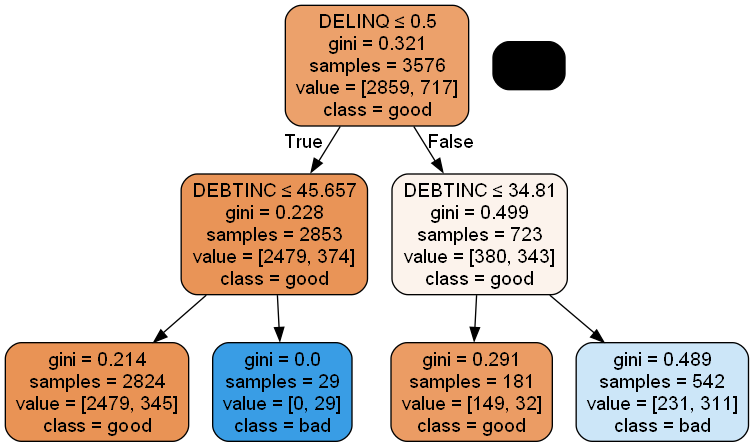

In [12]:
# simple tree
cart1 = tree.DecisionTreeClassifier(criterion='gini',max_depth=2,random_state=0)
cart1.fit(X_train, y_train)
dot_data = export_graphviz(cart1, out_file=None, feature_names=Xname,
    class_names=yname,filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

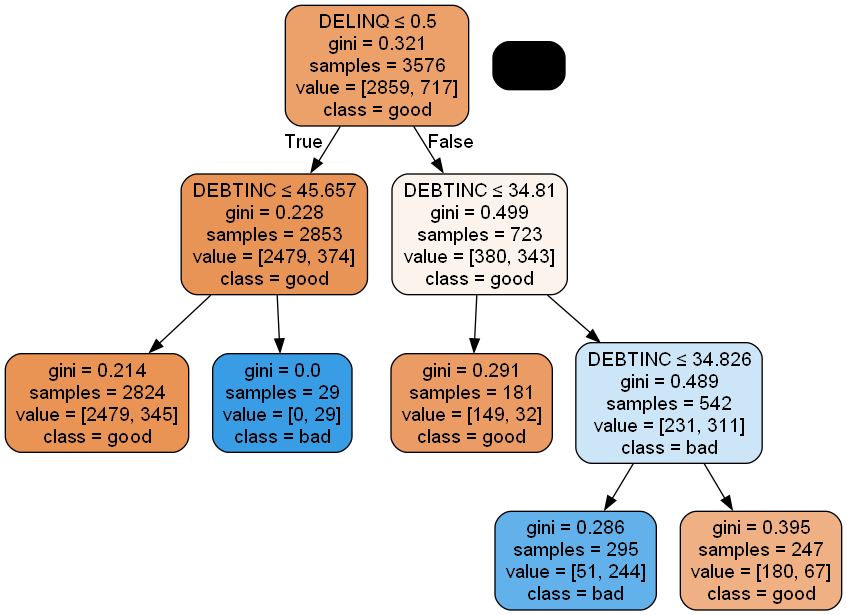

In [13]:
# longer tree2
cart2 = tree.DecisionTreeClassifier(criterion='gini',min_impurity_decrease=0.01,min_samples_split=20,random_state=0)
cart2.fit(X_train, y_train)
dot_data = export_graphviz(cart2, out_file=None, feature_names=Xname,
    class_names=yname,filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

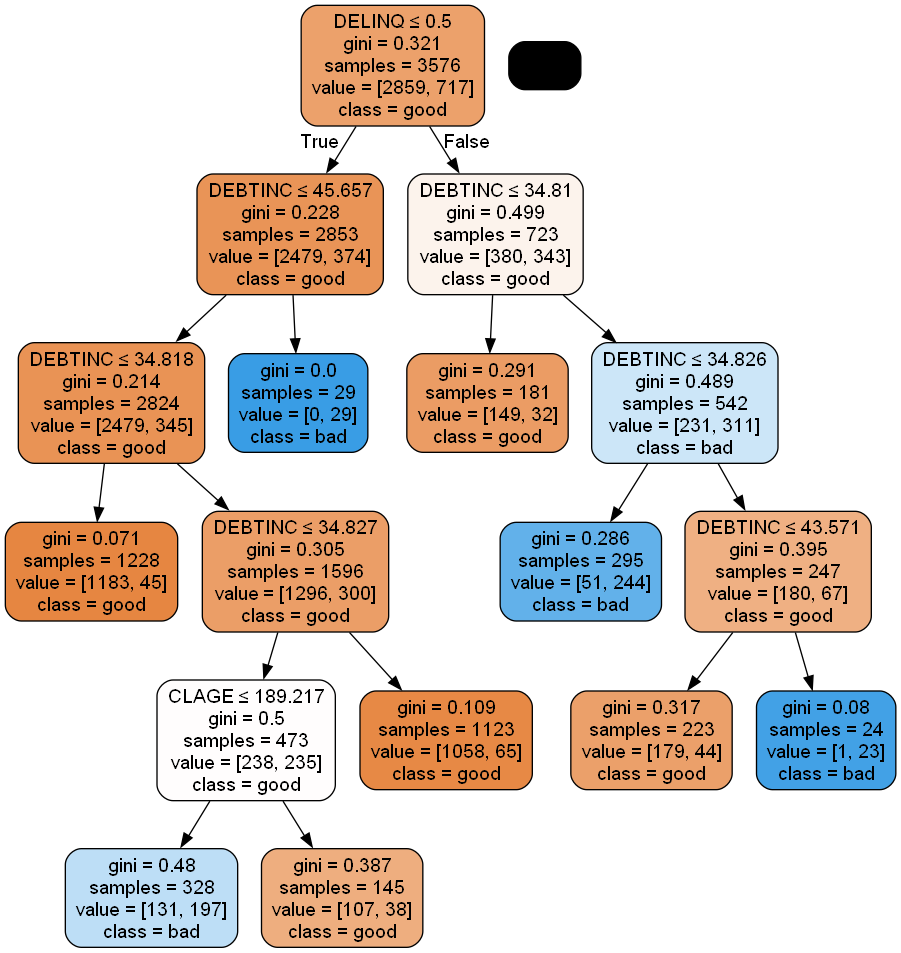

In [14]:
# longer tree3
cart3 = tree.DecisionTreeClassifier(criterion='gini',min_impurity_decrease=0.005,min_samples_split=20,random_state=0)
cart3.fit(X_train, y_train)
dot_data = export_graphviz(cart3, out_file=None, feature_names=Xname,
    class_names=yname,filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

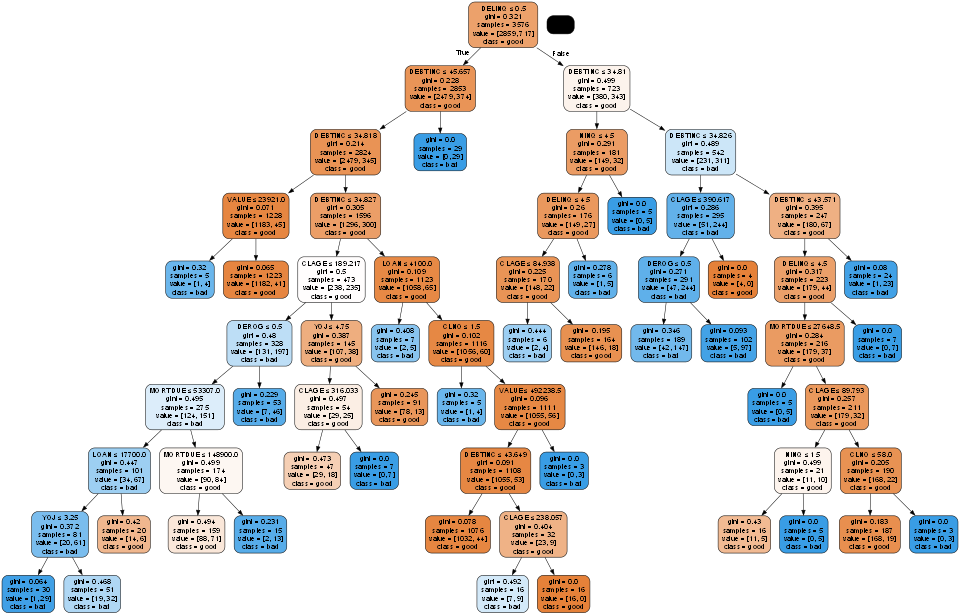

In [15]:
# longer tree4
cart4 = tree.DecisionTreeClassifier(criterion='gini',min_impurity_decrease=0.001,min_samples_split=20,random_state=0)
cart4.fit(X_train, y_train)
dot_data = export_graphviz(cart4, out_file=None, feature_names=Xname,
    class_names=yname,filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.set_size('"10,10"')
Image(graph.create_png())

In [16]:
##############################
# Accuracy comparison of several trees
y_prob1 = cart1.predict_proba(X_test)[:,1]
y_prob2 = cart2.predict_proba(X_test)[:,1]
y_prob3 = cart3.predict_proba(X_test)[:,1]
y_prob4 = cart4.predict_proba(X_test)[:,1]
y_prob0 = cart0.predict_proba(X_test)[:,1]

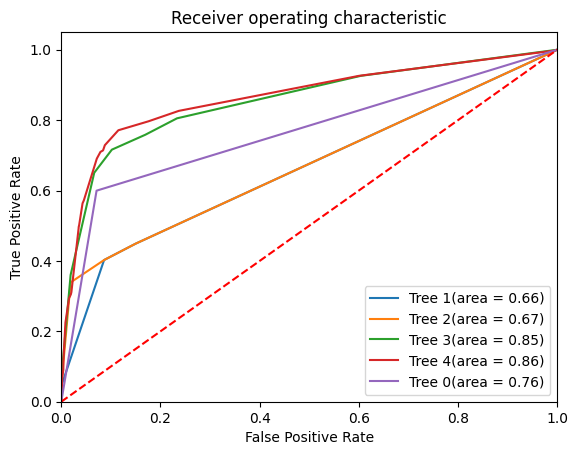

In [17]:
##############################
# ROC Curve #
roc_auc = roc_auc_score(y_test, y_prob1 )
fpr, tpr, thresholds = roc_curve(y_test, y_prob1)
roc_auc2 = roc_auc_score(y_test, y_prob2 )
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_prob2)
roc_auc3 = roc_auc_score(y_test, y_prob3 )
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_prob3)
roc_auc4 = roc_auc_score(y_test, y_prob4 )
fpr4, tpr4, thresholds4 = roc_curve(y_test, y_prob4)
roc_auc0 = roc_auc_score(y_test, y_prob0 )
fpr0, tpr0, thresholds0 = roc_curve(y_test, y_prob0)
plt.figure()
plt.plot(fpr, tpr, label='Tree 1(area = %0.2f)' % roc_auc)
plt.plot(fpr2, tpr2, label='Tree 2(area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, label='Tree 3(area = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, label='Tree 4(area = %0.2f)' % roc_auc4)
plt.plot(fpr0, tpr0, label='Tree 0(area = %0.2f)' % roc_auc0)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Mean accuracy score: 0.896


<Axes: >

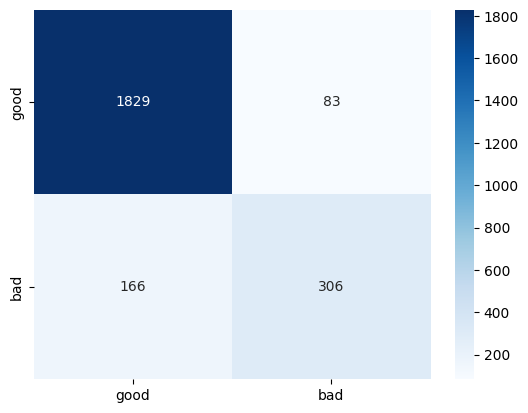

In [23]:
##############################
# Bagging
bagging = RandomForestClassifier(n_estimators=100, max_features=None, random_state=1234)
bagging.fit(X_train, y_train)
# Accuracy
bagging_pred = bagging.predict(X_test)
accuracy = accuracy_score(y_test, bagging_pred)
print(f'Mean accuracy score: {accuracy:.3}')
# Confusion Matrix
cm = pd.DataFrame(confusion_matrix(y_test, bagging_pred), columns=yname, index=yname)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

In [25]:
# Prediction probability
y_prob_bag = bagging.predict_proba(X_test)[:,1]
roc_auc_bag = roc_auc_score(y_test, y_prob_bag )
fpr_bag, tpr_bag, thresholds_bag = roc_curve(y_test, y_prob_bag)
print(fpr_bag)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.23012552e-04 5.23012552e-04 1.56903766e-03
 2.09205021e-03 2.09205021e-03 2.61506276e-03 3.13807531e-03
 4.18410042e-03 5.23012552e-03 5.23012552e-03 5.75313808e-03
 6.79916318e-03 7.32217573e-03 8.36820084e-03 8.89121339e-03
 1.09832636e-02 1.20292887e-02 1.30753138e-02 1.46443515e-02
 1.46443515e-02 1.56903766e-02 1.56903766e-02 1.56903766e-02
 1.67364017e-02 1.88284519e-02 1.88284519e-02 1.93514644e-02
 1.93514644e-02 1.98744770e-02 2.14435146e-02 2.40585774e-02
 2.51046025e-02 2.61506276e-02 2.92887029e-02 3.08577406e-02
 3.19037657e-02 3.24267782e-02 3.34728033e-02 3.39958159e-02
 3.55648536e-02 3.71338912e-02 3.87029289e-02 4.13179916e-02
 4.23640167e-02 4.34100418e-02 4.65481172e-02 4.86401674e-02
 5.07322176e-02 5.33472803e-02 5.38702929e-02 5.59623431e-02
 5.70083682e-02 6.01464435e-02 6.27615063e-02 6.48535565e-02
 6.64225941e-02 6.79916318e-02 6.95606695e-02 7.11297071e-02
 7.37447699e-02 7.635983

Mean accuracy score: 0.907


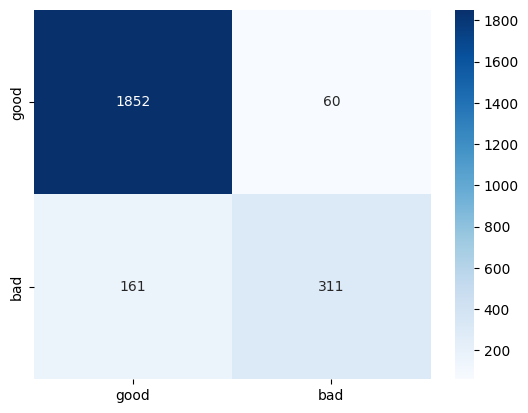

In [26]:
##############################
# Random Forest 1
rf = RandomForestClassifier(n_estimators=1000, max_features='sqrt', oob_score=True, random_state=1234)
rf.fit(X_train, y_train)
# Accuracy
rf_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, rf_pred)
print(f'Mean accuracy score: {accuracy:.3}')
# Confusion Matrix
cm = pd.DataFrame(confusion_matrix(y_test, rf_pred), columns=yname, index=yname)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
y_prob_rf = rf.predict_proba(X_test)[:,1]
roc_auc_rf = roc_auc_score(y_test, y_prob_rf )
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)

Mean accuracy score: 0.908


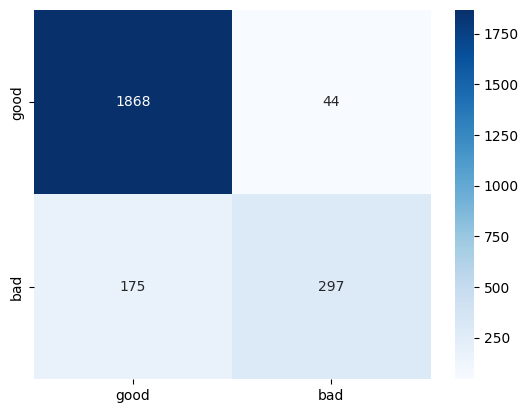

In [20]:
##############################
# Random Forest 2
rf1 = RandomForestClassifier(n_estimators=100, max_features=2, oob_score=True, random_state=1234)
rf1.fit(X_train, y_train)
rf1_pred = rf1.predict(X_test)
accuracy = accuracy_score(y_test, rf1_pred)
print(f'Mean accuracy score: {accuracy:.3}')
# Confusion Matrix
cm = pd.DataFrame(confusion_matrix(y_test, rf1_pred), columns=yname, index=yname)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
y_prob_rf1 = rf1.predict_proba(X_test)[:,1]
roc_auc_rf1 = roc_auc_score(y_test, y_prob_rf1 )
fpr_rf1, tpr_rf1, thresholds_rf1 = roc_curve(y_test, y_prob_rf1)

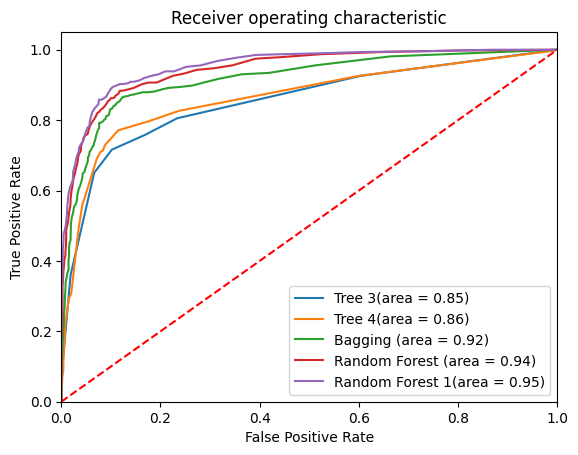

In [21]:
##############################
# ROC Curve #
plt.figure()
plt.plot(fpr3, tpr3, label='Tree 3(area = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, label='Tree 4(area = %0.2f)' % roc_auc4)
plt.plot(fpr_bag, tpr_bag, label='Bagging (area = %0.2f)' % roc_auc_bag)
plt.plot(fpr_rf, tpr_rf, label='Random Forest (area = %0.2f)' % roc_auc_rf)
plt.plot(fpr_rf1, tpr_rf1, label='Random Forest 1(area = %0.2f)' % roc_auc_rf1)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

LOAN = 0.10354216874117343
MORTDUE = 0.0919849693907363
VALUE = 0.10368419693753772
YOJ = 0.06885854052439579
DEROG = 0.0612204426794415
DELINQ = 0.11710553168482069
CLAGE = 0.10711571078266559
NINQ = 0.0476028370509734
CLNO = 0.08751919324820463
DEBTINC = 0.211366408960051


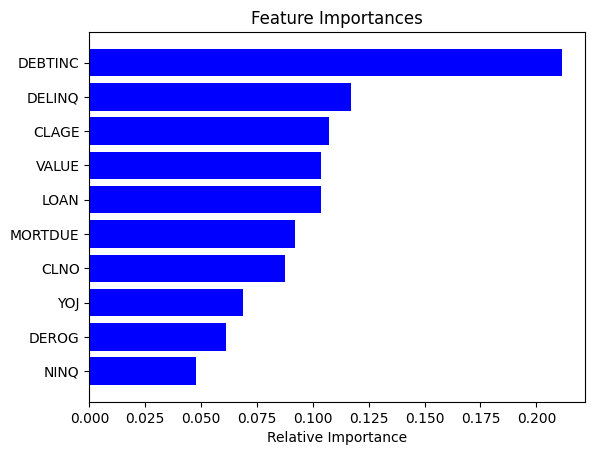

In [22]:
##############################
# Get numerical feature importances
importances = rf1.feature_importances_
for name, importance in zip(Xname, importances): print(name, "=", importance)
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)),X_train.columns[indices])
plt.xlabel('Relative Importance')
plt.show()